# Nama : Febilah Purtin
# NIM  : A11.2022.14209
# Kelompok : A11.4410

# 1) PREDIKSI DETEKSI PENYAKIT KANKER PAYUDARA DENGAN MENGGUNAKAN ALGORITMA DECISION TREE

# 2)
Kanker merupakan salah satu penyakit pembunuh terbesar di dunia dan sulit
untuk disembuhkan. Deteksi dini kanker dapat dilakukan melalui serangkaian uji
laboratorium yang dapat mengidentifikasi kanker jinak atau ganas. Kanker payudara
termasuk dalam jenis kanker ganas dan memiliki gejala awal berupa benjolan yang
semakin membesar. Data mining, khususnya metode klasifikasi, dapat digunakan untuk
menganalisis data uji laboratorium dan mengkategorikan kanker payudara menjadi jinak
dan ganas. Decision tree adalah metode klasifikasi yang digunakan dalam penelitian ini, sebagai pilihan untuk deteksi kanker payudara. Data yang digunakan pada penelitian ini merupakan Breast Cancer Coimbra Dataset yang dapat diunduh secara gratis di website resmi UCI Machine Learning tahun 2018.

Latar belakang penelitian ini adalah untuk mengembangkan suatu sistem
prediksi menggunakan metode decision tree  untuk deteksi penyakit kanker payudara. Sistem
ini diharapkan dapat membantu dokter dalam mengambil keputusan yang lebih
akurat dan tepat waktu dalam menegakkan diagnosis kanker payudara. Dengan
demikian, diharapkan dapat mengurangi risiko kematian akibat kanker payudara
dan meningkatkan tingkat kesembuhan pasien.

Berdasarkan pernyataan masalah yang sudah dijabarkan, tujuan yang ingin
dicapai dalam penelitian ini adalah mengklasifikasikan penyakit kanker payudara
menggunakan algoritma decision tree untuk pemantauan dalam proses
pengobatan

Model Design Sistem pada gambar dibawah :    

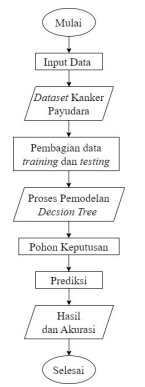

# 3)
Dataset diambil dari UCI Dataset ( Breast Cancer Wisconsin (Diagnostic) )

Informasi tentang Dataset :      
Fitur dihitung dari gambar digital dari fine needle aspirate (FNA) dari massa payudara. Fitur tersebut menggambarkan karakteristik inti sel yang ada dalam gambar. Beberapa gambar dapat ditemukan di http://www.cs.wisc.edu/~street/images/ Bidang pemisah yang dijelaskan di atas diperoleh menggunakan Multisurface Method-Tree (MSM-T) [KP Bennett, "Decision Tree Construction Via Linear Programming." Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, hlm. 97-101, 1992], metode klasifikasi yang menggunakan pemrograman linier untuk membangun pohon keputusan. Fitur yang relevan dipilih menggunakan pencarian menyeluruh dalam ruang 1-4 fitur dan 1-3 bidang pemisah. Program linier aktual yang digunakan untuk memperoleh bidang pemisah dalam ruang 3 dimensi adalah yang dijelaskan dalam: [KP Bennett dan OL Mangasarian: "Diskriminasi Pemrograman Linier Kuat pada Dua Set yang Tidak Dapat Dipisahkan Secara Linier", Metode dan Perangkat Lunak Optimasi 1, 1992, 23-34]. Basis data ini juga tersedia melalui server ftp UW CS: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Basis Data Diagnostik Kanker Payudara Wisconsin :    
- Karakteristik Dataset : Multivariate
- Feature Type :   Real
- Bidang Studi :   Kedokteran dan Kesehatan
- Contoh : 569
- Tugas Terkait :   Klasifikasi
- Fitur : 30

Data tidak memiliki Missing Value

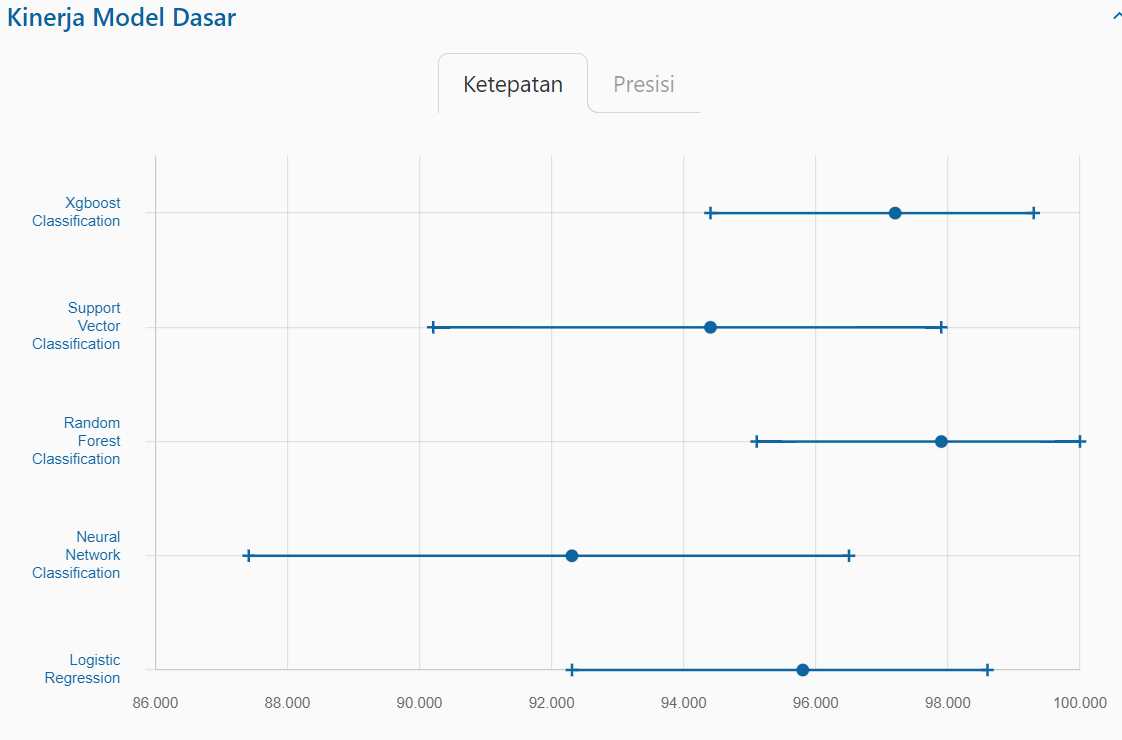

# 4) Proses Learning / Modeling

# 1) Mengumpulkan data
- mengambil dataset dari UCI Dataset
- mengunduh 2 file dengan esktensi data dan name


# 2) Menelaah Data
terdiri dari :

- Load Library yang diperlukan.
- Load Dataset Breast Cancer.
- Memberi nama header atribut atau fitur (jika belum ada).
- Menganalisa tipe dan relasi data (melihat tipe dataset, ukuran dataset, distribusi class, deskripsi dataset).
- Memberikan laporan atau kesimpulan dari kegiatan menelaah data Breast Cancer.

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

#import sys
#sys.path.append('/content/drive/My Drive/Colab Notebooks/')

Load Library => pandas, numpy, sklearn, matplotlib, seaborn, missingno (jika belum ada install dulu => conda install ...)

Install library yang diperlukan (pandas, numpy, sklearn, matplotlib, seaborn, missingno) => conda install pandas, numpy, sklearn, matplotlib, seaborn, missingno atau => pip install pandas, numpy, sklearn, matplotlib, seaborn, missingno

In [ ]:
# Load Library yang diperlukan

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# Load Dataset

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
df = pd.read_csv(url, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Memberi nama header atribut atau fitur (karena fitur tidak terlihat maka perlu kita beri nama terlebih dahulu)

df.columns = ['id', 'diagnosis', 'fitur 2', 'fitur 3', 'fitur 4', 'fitur 5', 'fitur 6', 'fitur 7', 'fitur 8', 'fitur 9',
'fitur 10', 'fitur 11', 'fitur 12', 'fitur 13', 'fitur 14', 'fitur 15', 'fitur 16', 'fitur 17', 'fitur 18', 'fitur 19',
'fitur 20', 'fitur 21', 'fitur 22', 'fitur 23', 'fitur 24', 'fitur 25', 'fitur 26', 'fitur 27', 'fitur 28', 'fitur 29',
'fitur 30', 'fitur 31']

df.head()

,id,diagnosis,fitur 2,fitur 3,fitur 4,fitur 5,fitur 6,fitur 7,fitur 8,fitur 9,...,fitur 22,fitur 23,fitur 24,fitur 25,fitur 26,fitur 27,fitur 28,fitur 29,fitur 30,fitur 31
0,842302,M,17.99,10.38,122,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0
1,842517,M,20.57,17.77,132,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0
2,84300903,M,19.69,21.25,130,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0
3,84348301,M,11.42,20.38,77,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0
4,84358402,M,20.29,14.34,135,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0


# 3) Memvalidasi Data
terdiri dari :

Merubah fitur yang mempunyai tanda (?) menjadi nilai NaN

In [ ]:
# Cek dataframe yang missing dengan tanda "?"
df.head()

,id,diagnosis,fitur 2,fitur 3,fitur 4,fitur 5,fitur 6,fitur 7,fitur 8,fitur 9,...,fitur 22,fitur 23,fitur 24,fitur 25,fitur 26,fitur 27,fitur 28,fitur 29,fitur 30,fitur 31
0,842302,M,17.99,10.38,122,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0
1,842517,M,20.57,17.77,132,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0
2,84300903,M,19.69,21.25,130,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0
3,84348301,M,11.42,20.38,77,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0
4,84358402,M,20.29,14.34,135,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0


In [ ]:
# Merubah nilai "?" menjadi "NaN" dengan library numpy.nan
df.replace("?", np.nan, inplace=True)

In [ ]:
# Melihat hasil setelah dirubah => semula "?" menjadi "NaN"
df.head()

,id,diagnosis,fitur 2,fitur 3,fitur 4,fitur 5,fitur 6,fitur 7,fitur 8,fitur 9,...,fitur 22,fitur 23,fitur 24,fitur 25,fitur 26,fitur 27,fitur 28,fitur 29,fitur 30,fitur 31
0,842302,M,17.99,10.38,122,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0
1,842517,M,20.57,17.77,132,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0
2,84300903,M,19.69,21.25,130,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0
3,84348301,M,11.42,20.38,77,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0
4,84358402,M,20.29,14.34,135,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0


In [ ]:
# Mengecek apakah dataframe ada nilai kosong atau "NaN"
df.isnull().values.any()

False

In [ ]:
# Melihat lokasi pada kolom dataframe yang kosong atau "NaN"
df.loc[:, df.isnull().any()].columns

Index([], dtype='object')

In [ ]:
# Melihat prosentasi dari nilai kosong (NaN) untuk fitur 4 dan fitur 31
df.loc[:,list(df.loc[:,df.isnull().any()].columns)].isnull().sum()/(len(df))*100

Series([], dtype: float64)

In [ ]:
# Gunakan Replace Missing Values untuk Fitur 4 dan Fitur 31
df[['fitur 4', 'fitur 31']]

,fitur 4,fitur 31
0,122,0
1,132,0
2,130,0
3,77,0
4,135,0
...,...,...
564,142,0
565,131,0
566,108,0
567,140,0


# 4) Menentukan Objek Data


# 5) Membersihkan Data
Strategi pembersihan data :

Perbaiki nilai yang hilang.
Hapus data duplikat.
Cek fitur yang bernilai konstant.

In [ ]:
# Memperbaiki nilai yang hilang
# Visualisasi data nilai yang hilang
missingdata_df = df.columns[df.isnull().any()].tolist()

In [ ]:
# Memperbaiki nilai yang hilang dengan nilai rata-rata (median) => fillna : untuk mengisi nilai yang kosong
median_value = df['fitur 4'].median()
df['fitur 4']=df['fitur 4'].fillna(median_value)

median_value = df['fitur 31'].median()
df['fitur 31']=df['fitur 31'].fillna(median_value)

In [ ]:
# Melihat kembali prosentasi dari nilai kosong (NaN) untuk fitur 4 dan fitur 31 setelah dibersihkan
df.loc[:,list(df.loc[:,df.isnull().any()].columns)].isnull().sum()/(len(df))*100

Series([], dtype: float64)

Dataset sudah bersih karena tidak ada nilai null

In [ ]:
# Menghapus Data Duplikat
# Melihat ukuran baris dan kolom dataframe
df.shape

(569, 32)

In [ ]:
# Menghapus Data Duplikat dan melihat kembali ukuran baris & kolom dataframe
df = df.drop_duplicates()
df.shape

(569, 32)

Tidak ada data yang sama

In [ ]:
# Menghapus fitur yang bernilai konstant
df = df.loc[:, df.apply(pd.Series.nunique) !=1]

df.shape

(569, 31)

Tidak ada fitur yang bernilai konstan

# 6) Mengkonstruksi Data
terdiri dari :

- Representasi fitur dan merubah tipenya.
- Membagi data menjadi training dan testing.
- Membandingkan Data Original, Data Normalisasi, Data Original PCA, Data Normalisasi PCA

In [ ]:
# Mengecek Representasi Fitur
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         569 non-null    int64  
 1   diagnosis  569 non-null    object 
 2   fitur 2    569 non-null    float64
 3   fitur 3    569 non-null    float64
 4   fitur 4    569 non-null    int64  
 5   fitur 5    569 non-null    float64
 6   fitur 6    569 non-null    float64
 7   fitur 7    569 non-null    float64
 8   fitur 8    569 non-null    float64
 9   fitur 9    569 non-null    float64
 10  fitur 10   569 non-null    float64
 11  fitur 11   569 non-null    float64
 12  fitur 12   569 non-null    float64
 13  fitur 13   569 non-null    float64
 14  fitur 14   569 non-null    float64
 15  fitur 15   569 non-null    float64
 16  fitur 16   569 non-null    float64
 17  fitur 17   569 non-null    float64
 18  fitur 18   569 non-null    float64
 19  fitur 19   569 non-null    float64
 20  fitur 20  

In [ ]:
# Mengubah yang tipe Object menjadi int64
df['diagnosis'] = pd.factorize(df.diagnosis)[0]

In [ ]:
# Cek kembali Representasi Fitur
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         569 non-null    int64  
 1   diagnosis  569 non-null    int64  
 2   fitur 2    569 non-null    float64
 3   fitur 3    569 non-null    float64
 4   fitur 4    569 non-null    int64  
 5   fitur 5    569 non-null    float64
 6   fitur 6    569 non-null    float64
 7   fitur 7    569 non-null    float64
 8   fitur 8    569 non-null    float64
 9   fitur 9    569 non-null    float64
 10  fitur 10   569 non-null    float64
 11  fitur 11   569 non-null    float64
 12  fitur 12   569 non-null    float64
 13  fitur 13   569 non-null    float64
 14  fitur 14   569 non-null    float64
 15  fitur 15   569 non-null    float64
 16  fitur 16   569 non-null    float64
 17  fitur 17   569 non-null    float64
 18  fitur 18   569 non-null    float64
 19  fitur 19   569 non-null    float64
 20  fitur 20  

In [ ]:
# Membagi Training dan Testing
X = df.iloc[:,1:32]
y = df['diagnosis']

# Menampilkan X
X.head()

,diagnosis,fitur 2,fitur 3,fitur 4,fitur 5,fitur 6,fitur 7,fitur 8,fitur 9,fitur 10,...,fitur 21,fitur 22,fitur 23,fitur 24,fitur 25,fitur 26,fitur 27,fitur 28,fitur 29,fitur 30
0,0,17.99,10.38,122,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601
1,0,20.57,17.77,132,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750
2,0,19.69,21.25,130,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613
3,0,11.42,20.38,77,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638
4,0,20.29,14.34,135,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364


In [ ]:
# Menampilkan y
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diagnosis, dtype: int64

# **Data Original**

In [ ]:
# Membagi data menjadi training = 70% dan testing = 30%
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.3, random_state=2022)

In [ ]:
# Menampilkan Data
X_train.head()

,diagnosis,fitur 2,fitur 3,fitur 4,fitur 5,fitur 6,fitur 7,fitur 8,fitur 9,fitur 10,...,fitur 21,fitur 22,fitur 23,fitur 24,fitur 25,fitur 26,fitur 27,fitur 28,fitur 29,fitur 30
479,0,16.25,19.51,109,815.8,0.10260,0.18930,0.223600,0.091940,0.2151,...,0.006355,17.39,23.05,122.10,939.7,0.1377,0.44620,0.58970,0.17750,0.3318
209,1,15.27,12.91,98,725.5,0.08182,0.06230,0.058920,0.031570,0.1359,...,0.001656,17.38,15.92,113.70,932.7,0.1222,0.21860,0.29620,0.10350,0.2320
408,0,17.99,20.66,117,991.7,0.10360,0.13040,0.120100,0.088240,0.1992,...,0.003336,21.08,25.41,138.10,1349.0,0.1482,0.37350,0.33010,0.19740,0.3060
522,1,11.26,19.83,71,388.1,0.08511,0.04413,0.005067,0.005664,0.1637,...,0.002295,11.93,26.43,76.38,435.9,0.1108,0.07723,0.02533,0.02832,0.2557
372,0,21.37,15.10,141,1386.0,0.10010,0.15150,0.193200,0.125500,0.1973,...,0.004367,22.69,21.84,152.10,1535.0,0.1192,0.28400,0.40240,0.19660,0.2730


# **Data Normalisasi**

In [ ]:
# Normalisasi menggunakan StandardScaler
X_norm = StandardScaler().fit_transform(X)

In [ ]:
# Melihat hasil normalisasi dengan StandardScaler
X_norm

array([[-1.29767572,  1.09706398, -2.07333501, ...,  2.10952635,
         2.29607613,  2.75062224],
       [-1.29767572,  1.82982061, -0.35363241, ..., -0.14674897,
         1.0870843 , -0.24388967],
       [-1.29767572,  1.57988811,  0.45618695, ...,  0.85497394,
         1.95500035,  1.152255  ],
       ...,
       [-1.29767572,  0.70228425,  2.0455738 , ...,  0.3267666 ,
         0.41406869, -1.10454895],
       [-1.29767572,  1.83834103,  2.33645719, ...,  3.19760468,
         2.28998549,  1.91908301],
       [ 0.77060855, -1.80840125,  1.22179204, ..., -1.30583065,
        -1.74506282, -0.04813821]])

In [ ]:
X_train_norm, X_test_norm, Y_train_norm, Y_test_norm = train_test_split(X_norm,y, test_size=0.3, random_state=2022)

# **Data Original PCA**

In [ ]:
pca = PCA(random_state=2022)
pca.fit(X)
ori_pca_array = pca.transform(X)
ori_pca = pd.DataFrame(ori_pca_array)
print("Heads of Original_PCA:",ori_pca.head())
var_ratio = pca.explained_variance_ratio_
print("\n Explained Variance Ratio:",var_ratio)
sv = pca.singular_values_
print("\n Singular Value:",sv)

Heads of Original_PCA:             0           1          2          3          4         5   \
0  1160.131330 -293.939198  48.596733  -8.650995  31.887475  1.572947   
1  1269.107886   15.601361 -35.358791  18.019602  -4.456236  0.160731   
2   995.811168   39.185221  -1.742457   4.047645  -0.313625 -3.019382   
3  -407.183790  -67.385476   8.675012 -11.760350   7.075211  1.401503   
4   930.355191  189.362911   1.350778   8.369432   7.732636  0.749027   

         6         7         8         9   ...        20        21        22  \
0  0.877377  0.117465  0.762164  0.665152  ... -0.048890 -0.017839  0.002992   
1 -0.122876  0.164636 -0.596224 -0.172881  ...  0.016063 -0.005021  0.003202   
2 -0.739011 -0.245879 -0.163639 -0.347811  ... -0.012540  0.013587 -0.004613   
3 -1.251629 -0.054936 -0.451542 -0.580895  ... -0.037733 -0.005363  0.001825   
4 -0.253720  0.325111  0.022634 -0.341130  ...  0.013727  0.010703  0.003405   

         23        24        25        26        27      

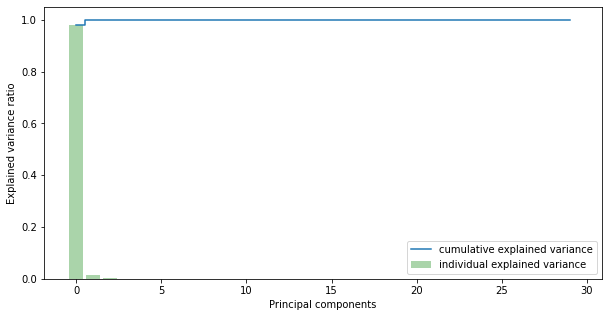

Cumulative explained ratio: [0.98204399 0.99822057 0.99977816 0.99989913 0.99998749 0.99999434
 0.99999837 0.99999919 0.99999954 0.99999974 0.99999991 0.99999996
 0.99999998 0.99999999 0.99999999 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


In [ ]:
# Visualisasi Data Original PCA
cum_var_ratio = np.cumsum(var_ratio)

plt.figure(figsize=(10, 5))
plt.bar(range(len(var_ratio)),
        var_ratio,
        alpha=0.3333,
        align='center',
        label='individual explained variance',
        color = 'g')
plt.step(range(len(cum_var_ratio)),
         cum_var_ratio,
         where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

print("Cumulative explained ratio:",cum_var_ratio)

In [ ]:
# Dipilih 18 PC
pca = PCA(n_components=18, random_state=2022)
pca.fit(X)
ori_pca_array = pca.transform(X)
ori_pca = pd.DataFrame(data=ori_pca_array, columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18'])

In [ ]:
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(ori_pca,y, test_size=0.3, random_state=2022)

# Data Normalisasi PCA

In [ ]:
pca = PCA(random_state=2022)
pca.fit(X_norm)
norm_pca_array = pca.transform(X_norm)
norm_pca = pd.DataFrame(norm_pca_array)
print("Heads of iris_pca:",norm_pca.head())
var_ratio = pca.explained_variance_ratio_
print("\n Explained variance ratio:",var_ratio)
sv = pca.singular_values_
print("\n Singular Value:",sv)

Heads of iris_pca:          0         1         2         3         4         5         6   \
0  9.002525  2.135742 -1.305997  3.581671 -1.360713  1.555572  2.075943   
1  2.719777 -3.864883 -0.065612  1.235685  0.363882  0.114205 -0.766541   
2  5.935507 -0.782664 -0.630546  0.872962 -0.135608  0.496589 -0.600240   
3  6.339366  9.506545 -3.915675 -0.267911 -2.698427  3.140545  0.799365   
4  4.265282 -1.506060  1.342332  2.965325  0.172809 -1.227746 -1.334714   

         7         8         9   ...        20        21        22        23  \
0  0.065721 -0.392081 -0.887718  ... -0.239144  0.170523  0.081864 -0.253747   
1 -0.097380 -0.340999  1.038152  ...  0.037055 -0.052667 -0.212582 -0.059070   
2  0.006737  0.068199  0.458184  ...  0.311513  0.206959 -0.072888  0.189331   
3 -1.098642 -1.602566 -1.117686  ...  0.570351  0.271110 -0.119603  0.201262   
4 -0.479396 -0.054446  0.351374  ... -0.108561 -0.076899  0.141002  0.024425   

         24        25        26        27        

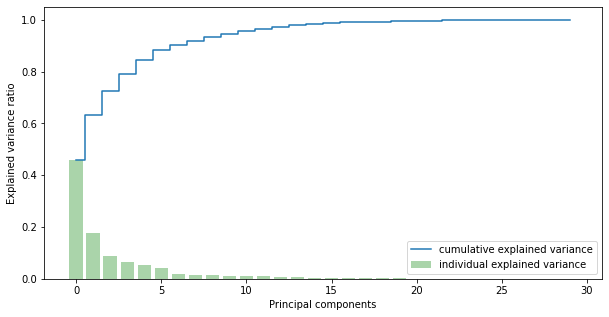

Cumulative explained ratio: [0.45703059 0.63437157 0.72380567 0.79008515 0.8447281  0.88471852
 0.90442601 0.92043044 0.93397053 0.9456683  0.95537073 0.96486365
 0.97355834 0.98061394 0.98538734 0.98824429 0.99035009 0.99210339
 0.99380857 0.99541355 0.99643608 0.99741751 0.99822705 0.99882649
 0.99941235 0.99968106 0.99991427 0.99996814 0.99999356 1.        ]


In [ ]:
# Visualisasi Data Normalisasi PCA
cum_var_ratio = np.cumsum(var_ratio)

plt.figure(figsize=(10, 5))
plt.bar(range(len(var_ratio)),
        var_ratio,
        alpha=0.3333,
        align='center',
        label='individual explained variance',
        color = 'g')
plt.step(range(len(cum_var_ratio)),
         cum_var_ratio,
         where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

print("Cumulative explained ratio:",cum_var_ratio)

In [ ]:
# Dipilih 18 PC
pca = PCA(n_components=18, random_state=2022)
pca.fit(X_norm)
norm_pca_array = pca.transform(X_norm)
norm_pca = pd.DataFrame(data=norm_pca_array, columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18'])


In [ ]:
X_train_norm_pca, X_test_norm_pca, Y_train_norm_pca, Y_test_norm_pca = train_test_split(norm_pca,y, test_size=0.3, random_state=2022)

# 5) Performa Model

# **7) Menentukan Label Data** **bold text**
Tidak perlu dikerjakan karena label sudah diputuskan dibagian transformasi data.
Merupakan Soal Tertulis.

8) Membangun Model
Teknik Pemodelan yang dipakai:
Menggunakan Decision Tree
Parameter yang dipakai:
- [criterion: gini, entropy]
- [max_depth]
- [min sample split]
- [min sample leaf]
Skenario Pengujian
Menggunakan akurasi, presisi dan recall.
Pengujian menggunakan Data Original.
Pengujian menggunakan Data yang sudah dinormalisasi.
Pengujian menggunakan Data Original yang diberikan PCA.
Pengujian menggunakan Data yang sudah dinormalisasi dan diberikan PCA.
menjadi soal coding

# **DECISION TREE**

In [ ]:
# Pemodelan Decision Tree
classifier_dt_pipeline = Pipeline([
                          ('model',DecisionTreeClassifier()),
                          ])

In [ ]:
# menyiapkan parameter yang digunakan
parameters_dt = {
                "model__max_depth": np.arange(1,21),
                "model__min_samples_leaf": np.arange(1,101,2),
                "model__min_samples_split": np.arange(2,11),
                "model__criterion": ['gini','entropy'],
                "model__random_state": [2022]
}

# Pemodelan Decision Tree

# Pemodelan dengan data original

In [ ]:
ori_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=3, n_jobs=-1)

In [ ]:
ori_classifier_dt.fit(X_train_norm,Y_train_norm.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'model__min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]),
                         'model__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'model__random_state': [2022]})

In [ ]:
ori_classifier_dt.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeClassifier(max_depth=1, random_state=2022))])

In [ ]:
for param_name in sorted(parameters_dt.keys()):
    print('%s: %r' %(param_name,ori_classifier_dt.best_params_[param_name]))

model__criterion: 'gini'
model__max_depth: 1
model__min_samples_leaf: 1
model__min_samples_split: 2
model__random_state: 2022


# Permodelan Decision Tree dengan data normalisasi

In [ ]:
norm_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=3, n_jobs=-1)

In [ ]:
norm_classifier_dt.fit(X_train_norm,Y_train_norm.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'model__min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]),
                         'model__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'model__random_state': [2022]})

In [ ]:
norm_classifier_dt.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeClassifier(max_depth=1, random_state=2022))])

In [ ]:
for param_name in sorted(parameters_dt.keys()):
    print('%s: %r' %(param_name,norm_classifier_dt.best_params_[param_name]))

model__criterion: 'gini'
model__max_depth: 1
model__min_samples_leaf: 1
model__min_samples_split: 2
model__random_state: 2022


# Pemodelan Decision Tree dengan Data Original tapi diberikan PCA

In [ ]:
ori_pca_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=3, n_jobs=-1)

In [ ]:
ori_pca_classifier_dt.fit(X_train_pca,Y_train_pca.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'model__min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]),
                         'model__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'model__random_state': [2022]})

In [ ]:
ori_pca_classifier_dt.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                        min_samples_leaf=3,
                                        random_state=2022))])

In [ ]:
for param_name in sorted(parameters_dt.keys()):
    print('%s: %r' %(param_name,ori_pca_classifier_dt.best_params_[param_name]))

model__criterion: 'entropy'
model__max_depth: 3
model__min_samples_leaf: 3
model__min_samples_split: 2
model__random_state: 2022


# Pemodelan Decision Tree dengan Data Normalisasi tapi diberikan PCA

In [ ]:
norm_pca_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=3, n_jobs=-1)

In [ ]:
norm_pca_classifier_dt.fit(X_train_norm_pca,Y_train_norm_pca.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'model__min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]),
                         'model__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'model__random_state': [2022]})

In [ ]:
norm_pca_classifier_dt.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        random_state=2022))])

In [ ]:
for param_name in sorted(parameters_dt.keys()):
    print('%s: %r' %(param_name,norm_pca_classifier_dt.best_params_[param_name]))

model__criterion: 'entropy'
model__max_depth: 5
model__min_samples_leaf: 1
model__min_samples_split: 2
model__random_state: 2022


# 9) Mengevaluasi Hasil Pemodelan

# Evaluasi Dengan Data Original

In [ ]:
ori_y_pred_dt_train = ori_classifier_dt.predict(X_train)

ori_accuracy_dt_train = accuracy_score(Y_train,ori_y_pred_dt_train)
print('Akurasi pada training set: ', ori_accuracy_dt_train)

ori_precision_dt_train = precision_score(Y_train,ori_y_pred_dt_train, average='micro')
print('Precision pada training set: ', ori_precision_dt_train)

ori_recall_dt_train = recall_score(Y_train,ori_y_pred_dt_train, average='micro')
print('Recall pada training set: ', ori_recall_dt_train)

ori_y_pred_dt_test = ori_classifier_dt.predict(X_test)

ori_accuracy_dt_test = accuracy_score(Y_test,ori_y_pred_dt_test)
print('Akurasi pada test set: ', ori_accuracy_dt_test)

ori_precision_dt_test = precision_score(Y_test,ori_y_pred_dt_test, average='micro')
print('Precision pada test set: ', ori_precision_dt_test)

ori_recall_dt_test = recall_score(Y_test,ori_y_pred_dt_test, average='micro')
print('Recall pada test set: ', ori_recall_dt_test)

Akurasi pada training set:  0.6381909547738693
Precision pada training set:  0.6381909547738693
Recall pada training set:  0.6381909547738693
Akurasi pada test set:  0.6023391812865497
Precision pada test set:  0.6023391812865497
Recall pada test set:  0.6023391812865497


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


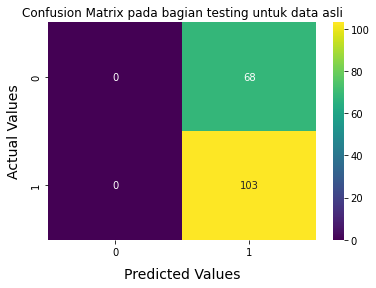

In [ ]:
# Visualisasi Confusion Matrix dengan Seaborn
sns.heatmap(confusion_matrix(Y_test,ori_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

# Evaluasi dengan Data Normalisasi

In [ ]:
norm_y_pred_dt_train = norm_classifier_dt.predict(X_train_norm)

norm_accuracy_dt_train = accuracy_score(Y_train_norm,norm_y_pred_dt_train)
print('Akurasi pada training set: ', norm_accuracy_dt_train)

norm_precision_dt_train = precision_score(Y_train_norm,norm_y_pred_dt_train, average='micro')
print('Precision pada training set: ', norm_precision_dt_train)

norm_recall_dt_train = recall_score(Y_train_norm,norm_y_pred_dt_train, average='micro')
print('Recall pada training set: ', norm_recall_dt_train)

norm_y_pred_dt_test = norm_classifier_dt.predict(X_test_norm)

norm_accuracy_dt_test = accuracy_score(Y_test_norm,norm_y_pred_dt_test)
print('Akurasi pada test set: ', norm_accuracy_dt_test)

norm_precision_dt_test = precision_score(Y_test_norm,norm_y_pred_dt_test, average='micro')
print('Precision pada test set: ', norm_precision_dt_test)

norm_recall_dt_test = recall_score(Y_test_norm,norm_y_pred_dt_test, average='micro')
print('Recall pada test set: ', norm_recall_dt_test)

Akurasi pada training set:  1.0
Precision pada training set:  1.0
Recall pada training set:  1.0
Akurasi pada test set:  1.0
Precision pada test set:  1.0
Recall pada test set:  1.0


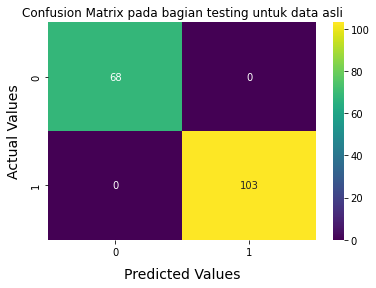

In [ ]:
# Visualisasi Confusion Matrix dengan Seaborn
sns.heatmap(confusion_matrix(Y_test_norm,norm_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

# Evaluasi PCA dengan Data Original

In [ ]:
ori_pca_y_pred_dt_train = ori_pca_classifier_dt.predict(X_train_pca)

ori_pca_accuracy_dt_train = accuracy_score(Y_train_pca,ori_pca_y_pred_dt_train)
print('Akurasi pada training set: ', ori_pca_accuracy_dt_train)

ori_pca_precision_dt_train = precision_score(Y_train_pca,ori_pca_y_pred_dt_train, average='micro')
print('Precision pada training set: ', ori_pca_precision_dt_train)

ori_pca_recall_dt_train = recall_score(Y_train_pca,ori_pca_y_pred_dt_train, average='micro')
print('Recall pada training set: ', ori_pca_recall_dt_train)

ori_pca_y_pred_dt_test = ori_pca_classifier_dt.predict(X_test_pca)

ori_pca_accuracy_dt_test = accuracy_score(Y_test_pca,ori_pca_y_pred_dt_test)
print('Akurasi pada test set: ', ori_pca_accuracy_dt_test)

ori_pca_precision_dt_test = precision_score(Y_test_pca,ori_pca_y_pred_dt_test, average='micro')
print('Precision pada test set: ', ori_pca_precision_dt_test)

ori_pca_recall_dt_test = recall_score(Y_test_pca,ori_pca_y_pred_dt_test, average='micro')
print('Recall pada test set: ', ori_pca_recall_dt_test)

Akurasi pada training set:  0.992462311557789
Precision pada training set:  0.992462311557789
Recall pada training set:  0.992462311557789
Akurasi pada test set:  0.9532163742690059
Precision pada test set:  0.9532163742690059
Recall pada test set:  0.9532163742690059


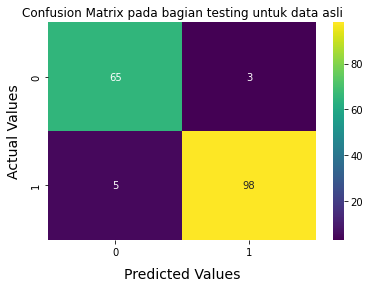

In [ ]:
# Visualisasi Confusion Matrix dengan Seaborn
sns.heatmap(confusion_matrix(Y_test_pca,ori_pca_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

# Evaluasi Data Normalisasi dengan PCA

In [ ]:
norm_pca_y_pred_dt_train = norm_pca_classifier_dt.predict(X_train_norm_pca)

norm_pca_accuracy_dt_train = accuracy_score(Y_train_norm_pca,norm_pca_y_pred_dt_train)
print('Akurasi pada training set: ', norm_pca_accuracy_dt_train)

norm_pca_precision_dt_train = precision_score(Y_train_norm_pca,norm_pca_y_pred_dt_train, average='micro')
print('Precision pada training set: ', norm_pca_precision_dt_train)

norm_pca_recall_dt_train = recall_score(Y_train_norm_pca,norm_pca_y_pred_dt_train, average='micro')
print('Recall pada training set: ', norm_pca_recall_dt_train)

norm_pca_y_pred_dt_test = norm_pca_classifier_dt.predict(X_test_norm_pca)

norm_pca_accuracy_dt_test = accuracy_score(Y_test_norm_pca,norm_pca_y_pred_dt_test)
print('Akurasi pada test set: ', norm_pca_accuracy_dt_test)

norm_pca_precision_dt_test = precision_score(Y_test_norm_pca,norm_pca_y_pred_dt_test, average='micro')
print('Precision pada test set: ', norm_pca_precision_dt_test)

norm_pca_recall_dt_test = recall_score(Y_test_norm_pca,norm_pca_y_pred_dt_test, average='micro')
print('Recall pada test set: ', norm_pca_recall_dt_test)

Akurasi pada training set:  1.0
Precision pada training set:  1.0
Recall pada training set:  1.0
Akurasi pada test set:  0.9590643274853801
Precision pada test set:  0.9590643274853801
Recall pada test set:  0.9590643274853801


# 11) Melakukan Proses Review Pemodelan

In [ ]:
models = [
          ('Decision Tree Data Original', ori_accuracy_dt_train, ori_accuracy_dt_test),
          ('Decision Tree Data Normalisasi', norm_accuracy_dt_train, norm_accuracy_dt_test),
          ('Decision Tree PCA Data Original', ori_pca_accuracy_dt_train, ori_pca_accuracy_dt_test),
          ('Decision Tree PCA Data Normalisasi', norm_pca_accuracy_dt_train, norm_pca_accuracy_dt_test),
         ]

In [ ]:
# Melakukan perbandingan hasil training akurasi dan test akurasi dengan 4 model
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Decision Tree Data Original,0.638191,0.602339
1,Decision Tree Data Normalisasi,1.000000,1.000000
2,Decision Tree PCA Data Original,0.992462,0.953216
3,Decision Tree PCA Data Normalisasi,1.000000,0.959064


In [ ]:
models_comparison = [
                        ('Decision Tree Data Original', ori_accuracy_dt_test, ori_recall_dt_test, ori_precision_dt_test),
                        ('Decision Tree Data Normalisasi', norm_accuracy_dt_test, norm_recall_dt_test, norm_precision_dt_test),
                        ('Decision Tree PCA Data Original', ori_pca_accuracy_dt_test, ori_pca_recall_dt_test, ori_pca_precision_dt_test),
                        ('Decision Tree PCA Data Normalisasi', norm_pca_accuracy_dt_test, norm_pca_recall_dt_test, norm_pca_precision_dt_test),
                    ]

In [ ]:
# Melakukan perbandingan hasil Akurasi, Presisi dan Recall pada data Testing dengan 4 model
comparison = pd.DataFrame(data = models_comparison, columns=['Model', 'Accuracy', 'Recall', 'Precision'])
comparison

,Model,Accuracy,Recall,Precision
0,Decision Tree Data Original,0.602339,0.602339,0.602339
1,Decision Tree Data Normalisasi,1.000000,1.000000,1.000000
2,Decision Tree PCA Data Original,0.953216,0.953216,0.953216
3,Decision Tree PCA Data Normalisasi,0.959064,0.959064,0.959064


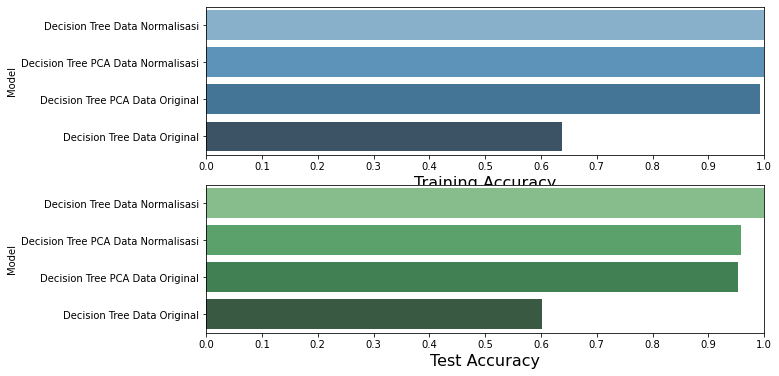

In [ ]:
# Visualisasi Perbandingan 4 model dengan Seaborn

f, axes = plt.subplots(2,1, figsize=(10,6))

predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Test Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

# 6) Kesimpulan :
berdasarkan case kanker payudara dapat disimpulkan permodelan decision tree yang tinggi akurasinya untuk digunakan adalah data PCA Normal , dan tingkat akurasi yang didapatkan dari data training sebesar 100% dan pada data testing sebesar 95%.